# Bank Customer Churn Predictive Modeling

1. Show data cleaning and preparation steps

2. Perform EDA on the given dataset and list out findings

3. Predict Churn rate using various models and technicals

4. Model validation and summary

In [225]:
# Importing neccessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy import stats
%matplotlib inline

# Libraries
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input"))
from plotly.offline import *

In [0]:
# Get mode values from mode function
def Mode(x, axis=0):
    return mode(x, axis).mode

## 1. Data Cleaning and preparation steps

In [0]:
# Load dataset
df_bank = pd.read_csv('churn.csv')
df_bank = df_bank.iloc[:, 5:]

In [228]:
# Quick view of data
df_bank.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [229]:
df_bank.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [0]:
# Quick view of the bill_id dataset
#ChurnRate = pd.DataFrame(columns = ['tenure', 'ChurnRate'])
churn = np.zeros((11,2))
for i in range(11):
  #ChurnRate.iloc[i, 0].value = i
  churn[i,0] = i
  a = np.sum(df_bank['Exited'][df_bank['Tenure']==i])

  b = df_bank['Exited'][df_bank['Tenure']==i].count()
  churn[i,1] = a/b

df_ChurnRate = pd.DataFrame(data = churn, columns=['tenure', 'ChurnRate'])

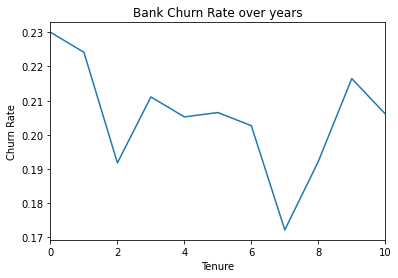

In [231]:
# Quick view of the churn rate trend over tenure
plt.title("Bank Churn Rate over years")
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
df_ChurnRate['ChurnRate'].plot.line()

In [232]:
# Get the median of the observations of dataset
df_bank[df_bank.columns[:10]].median()

CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
dtype: float64

In [233]:
# Percentage per category for the target column.
percentage_labels = df_bank['Exited'].value_counts(normalize = True) * 100
percentage_labels

0    79.63
1    20.37
Name: Exited, dtype: float64

In [0]:
churn     = df_bank[df_bank["Exited"] == 1]
not_churn = df_bank[df_bank["Exited"] == 0]
target_col = ["Exited"]
cat_cols   = df_bank.nunique()[df_bank.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df_bank.columns if x not in cat_cols + target_col]

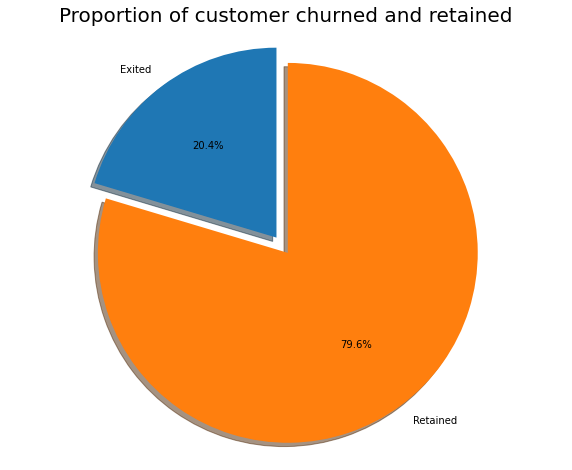

In [235]:

labels = 'Exited', 'Retained'
sizes = [df_bank.Exited[df_bank['Exited']==1].count(), df_bank.Exited[df_bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [0]:
#Separating churn and non churn customers
#function  for pie plot for customer attrition types
def plot_pie(column, filename_ = "temp.html") :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.plot(fig, filename= filename_)
    plt.show()
    
#for all categorical columns plot pie
#for i in cat_cols :
#    plot_pie(i)

In [237]:
# Libraries
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input"))
plt.show()
#function  for histogram for customer churn types
def histogram(column, filename_="temp.html") :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.plot(fig, filename = filename_)

In [0]:
# pie and histogram for categorical variable and continous variables
plot_pie(cat_cols[1], filename_= "GenderPie.html" )
histogram(num_cols[1], filename_ = "CreditScore.html")

## 2. Feature Engineering and EDA analysis
1. Tenure over age ( crossed later not much value added)
2. Balance over salary (crossed later as not much value added)
3. categorize continous variables (not used later as too much variance between train and test(99% vs. 87%), but if we have more features in original dataset, this can be very helpful)
4. Converting categorical data
5. correlation analysis

### 2.1. Converting Categorical data to one hot encoding
Convert all the categorical columns (geography and gender)
and delete one column in case of colinearity

---



In [0]:
# Dummy variables for Geographic
Geo_dummies = pd.get_dummies(df_bank['Geography'], prefix = 'geo', prefix_sep = ':')
df_bank = pd.concat([Geo_dummies, df_bank], axis = 1)

In [0]:
# Convert resident status to one hot encoding
df_bank['Gender'] = df_bank['Gender'].map({'Female': -1, 'Male': 1})

In [241]:

df_bank.head()

,geo:France,geo:Germany,geo:Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,619,France,-1,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,Spain,-1,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,502,France,-1,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,699,France,-1,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,Spain,-1,43,2,125510.82,1,1,1,79084.10,0


In [0]:
def plot_corr(df):
    f, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), mask=mask, cmap=sns.light_palette("navy"), linewidths=.75 )

def plot_corr_dependent(df, dep_name, titles):
  df_corr = df.corr()
  ax=df_corr[[dep_name]].plot(kind='bar')
  plt.xlabel('Attribute')
  plt.ylabel('Correlation')
  plt.title(titles)
  plt.tight_layout()

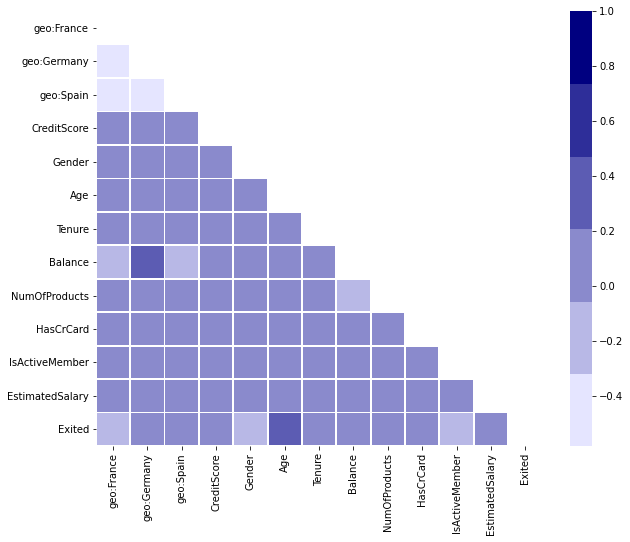

In [243]:
plot_corr(df_bank)

In [0]:
# library to use for categorize continuous variables ( for illustration as later we decided not to use this technicals)
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

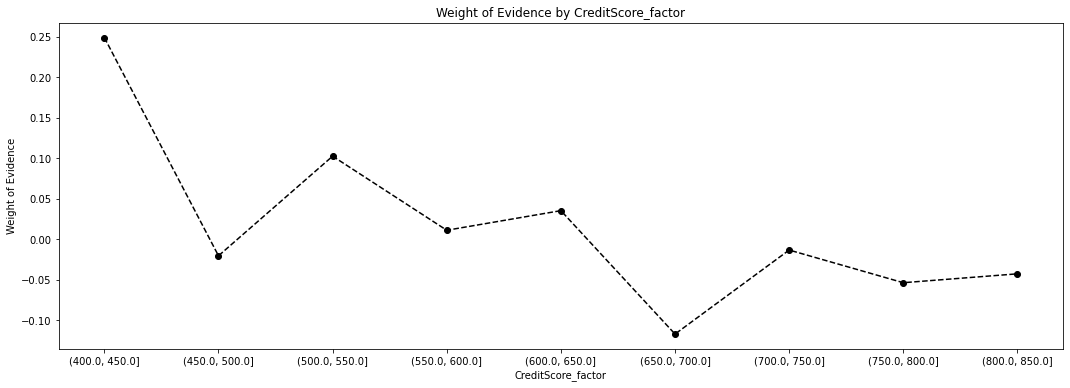

In [245]:
df_bank['CreditScore_factor'] = pd.cut(df_bank['CreditScore'], 10)
target_variable_df = df_bank['Exited']
df_temp = woe_ordered_continuous(df_bank, 'CreditScore_factor', target_variable_df)
plot_by_woe(df_temp)

In [0]:
# comments out as later we decided not to use
# similar technicals apply to several other variables and accuray is too high and suspect of over engieering
# should use in future case if have more features to distinguish 


#df_bank['creditScrore:<450'] = np.where((df_bank['CreditScore'].isin(range(450))), 1, 0)
#df_bank['creditScore:450-650'] = np.where((df_bank['CreditScore'].isin(range(450,650))), 1, 0)
#df_bank['creditScore:650-700'] = np.where((df_bank['CreditScore'].isin(range(650,700))), 1, 0)
#df_bank['creditScore:>700'] = np.where((df_bank['CreditScore'].isin(range(700, 851))), 1, 0)

In [0]:
df_bank.drop(['CreditScore_factor'], axis = 1, inplace= True)

# 2. Perform EDA on the given dataset and list out findings
First, I plot each numeric features with customer churn and not churn and see patterns Second, I plot boxplot for each numeric features to see if there is any outliers. Finally, I plot heatmap to see the correlation matrix and also the pairplot to see how features are correlated with each other.

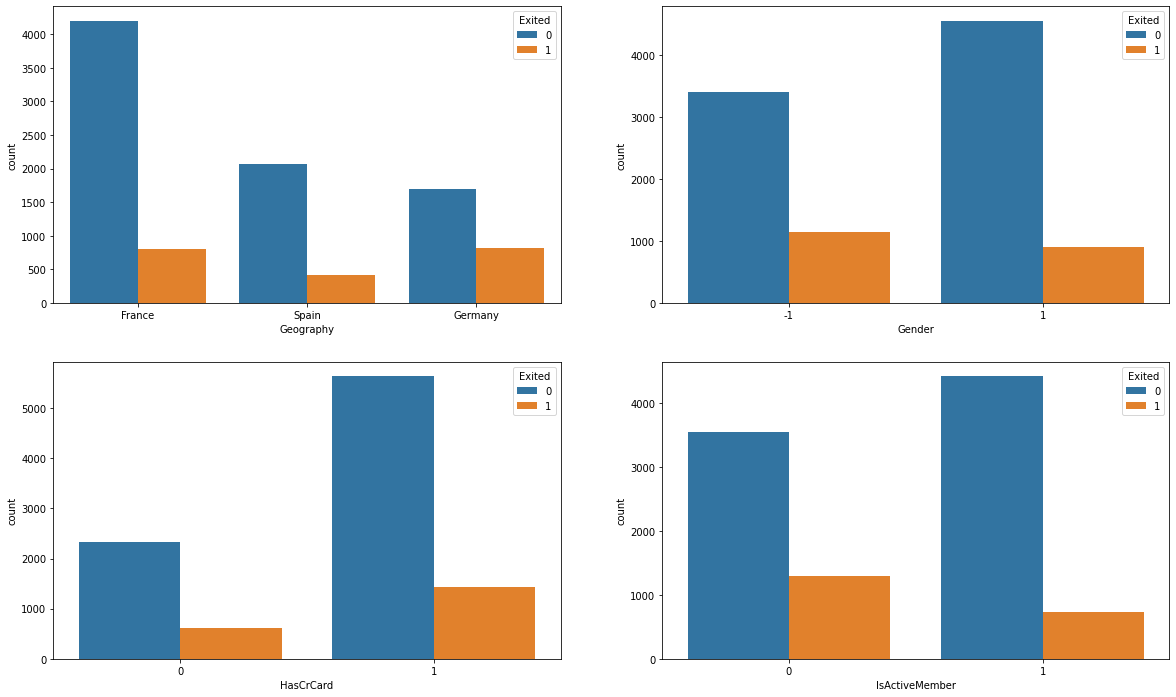

In [248]:
# We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df_bank, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df_bank, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df_bank, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df_bank, ax=axarr[1][1])

In [0]:
# Drop the original geography  feature
df_bank.drop(['Geography'], axis = 1, inplace = True)

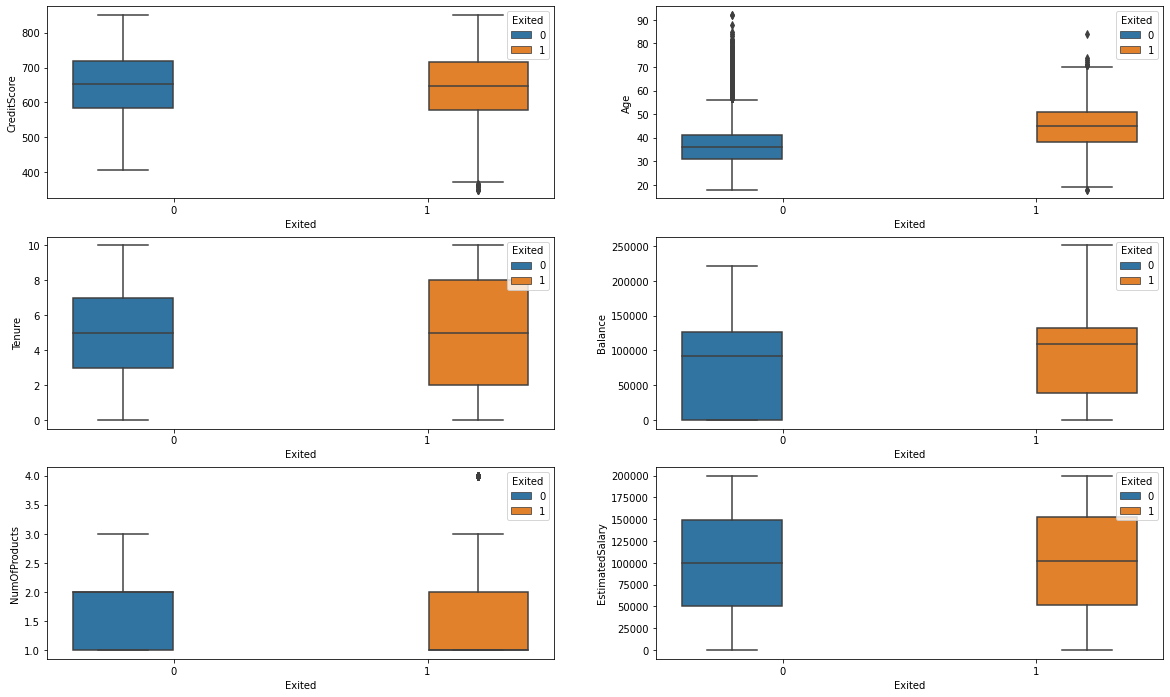

In [250]:
# Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df_bank, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df_bank , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df_bank, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df_bank, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df_bank, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df_bank, ax=axarr[2][1])

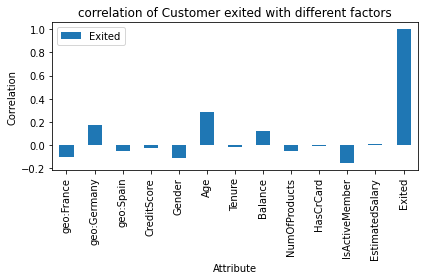

In [251]:
plot_corr_dependent(df_bank, "Exited", "correlation of Customer exited with different factors")

In [0]:
#histogram analysis and pie analysis (similar to above box plot but gives different angels)

plot_pie(cat_cols[2], filename_= "cat2.html" )
histogram(num_cols[2], filename_ = "num2.html")

# 3. Model Selection
First, although I didn't see any strong correlation between some of the features and target variable, I still decided to use a logistic regression at the beginning to evaluate the significance of each factors to the dependent variables. After that I decided to use a ANN with weighted scheme and smote/under sampling to try. to add some model complexity to overcome the underfitting problem. Finally, after select the final ANN model with class weights, I try the K force cross validation.   

## 3.1 Model library to use

In [0]:
class Standardization():
    
    def __init__(self, X):
        self.std = np.std(X, 0)
        self.mean = np.mean(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.mean)/(self.std + eposilon)
        return X_

class MeanNormalization():
    
    def __init__(self, X):
        self.max = np.max(X, 0)
        self.min = np.min(X, 0)
        self.mean = np.mean(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.mean)/(self.max - self.min + eposilon)
        return X_

class MaxMinNormalization():
    
    def __init__(self, X):
        self.max = np.max(X, 0)
        self.min = np.min(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.min)/(self.max - self.min + eposilon)
        return X_

In [0]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [0]:
class GenLogisticRegression():

  #def _init_(self, thresh=0.5):
  #  self.W = None
  #  self.B = None

  def _init_(self, thresh=0.5):
    # self.W = np.random.randn(D,K)
    # self.B = np.random.randn(K)
    self.W = None
    self.B = None

  def fit(self, X, y, eta = 2e-2, epochs = 1e3, show_curve = False):
    N,D = X.shape
    epochs = int(epochs)
    K = len(np.unique(y))

    #y_values = np.unique(y, return_index = False)
    Y = indices_to_one_hot(y,K).astype(int)

    try:
      self.W
    except AttributeError:
      self.W = np.random.randn(D,K)
      self.B = np.random.randn(K)

    J = np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self._forward_(X)
      J[epoch] = cross_entropy(Y,P_hat)
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("J")
      plt.title("Training Curve")
      plt.show()

  def _forward_(self, X):
      return softmax(X@self.W + self.B)

  def predict(self,X):
      return np.argmax(self._forward_(X),axis=1)

In [0]:
def sigmoid(h, epsilon = 1e-5):
    return 1/(1 + np.exp(-h + epsilon))

def cross_entropy(y, p_hat, epsilon = 1e-3):
    return -(1/len(y)) * np.sum(y * np.log(p_hat + epsilon)\
                                + (1- y) * np.log(1 - p_hat + epsilon))

#def cross_entropy(Y, P_hat):
#    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis = 1), axis = 0)


def weighted_cross_entropy(y, p_hat, eta = 1, epsilon = 1e-3):
    pos_w = (1/len(y[y == 1]))*eta
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg
                               
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

def cost(X, y, model, thresh):
    # cost weights
    fp = 10
    fn = 500
    # predict
    y_hat_n = model.predict(X[y == 0], thresh = thresh)
    y_hat_p = model.predict(X[y == 1], thresh = thresh)
    # get cost
    cost1 = fp*np.sum(y_hat_n == 1)
    cost2 = fn*np.sum(y_hat_p == 0)
    return cost1 + cost2

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y    

def indices_to_one_hot(data, nb_class):
    
    #coverts on iterable of indices to one hot labels
    targets = np.array(data).reshape(-1)
    return np.eye(nb_class)[targets]

def softmax(h):
    
    return (np.exp(h.T)/np.sum(np.exp(h), axis =1)).T

In [0]:
def linear(H):
    return H

def ReLu(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def stable_softmax(H):
    eH = np.exp(H - np.max(H))
    return eH / eH.sum(axis = 1, keepdims = True)
    

def sigmoid(H):

  return 1/(1 + np.exp(-H))


# only works for 0 and 1
#def cross_entropy (Y, p_hat):
#    return -np.sum(Y*np.log(p_hat))
# work for general case
def cross_entropy(Y, p_hat):
  return -(1/len(Y))*np.sum(Y*np.log(p_hat))

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y

def accuracy (y, y_hat):
    return np.mean(y == y_hat)

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)



def weighted_cross_entropy(y, p_hat, epsilon = 1e-3):
    pos_w = 1/len(y[y == 1])
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg


def R2(y, y_hat):
    return sqrt((y - y_hat)**2)

def derivative(Z, a):
  if a == "linear":
    return 1
  elif a == sigmoid :
    return Z*(1-Z)
  elif a==np.tanh :
    return 1 - Z*Z
  elif a == ReLu:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown activation")

In [0]:
class ANN():

  def __init__(self, architecture, activations = None, mode = 0):
    self.mode = mode
    self.architecture = architecture
    self.L = len( architecture) +1
    self.activations = activations

  def fit(self, X, y, eta= 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)

    if self.mode:
      Y = y
    else: 
      Y = one_hot_encode(y)
    
    N, D = X.shape
    K = Y.shape[1]

    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D]+self.architecture),(self.architecture + [K])), 1)}
        
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

    if self.activations is None:
      self.a = {l: ReLu for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)}

    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.forward(X)

      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L]) 
      else:
        J[epoch] = weighted_cross_entropy(Y, self.Z[self.L]) 
                    #cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L] - Y)

      for l in sorted(self.W.keys(), reverse= True):
        dW = self.Z[l-1].T @ dH
        db = dH.sum(axis = 0)
        
        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@(self.W[l]).T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])
       
       # print out J errors every 100 iterations
      if epoch % 100 == 0:
          print ( epoch, J[epoch])

          #print ("Epoch:{}".format(epoch))
          #print ("Train Error: {:.4f}".format(dH) )
          #print('Epoch:{}, train error: {:.4f} '.format(epoch , dH))
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("Loss function")
      plt.show


  def forward(self, X):
    
    self.Z ={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+ self.b[l] )
  
  def predict(self, X):

    self.forward(X)

    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis = 1)

In [0]:
'''Basic Logistic Regression'''

class LogisticRegression():
    
    def __init__(self, size):
        self.w = np.random.randn(size)
        self.b = np.random.randn(1)
    
    def fit(self, X_trn, y_trn,
            X_val, y_val,
            lr = 1e-1, epochs = 1e3,
            show_curve = False):
        
        epochs = int(epochs)
        N, D = X_trn.shape
        
        J_trn = np.zeros(epochs) # train loss
        J_val = np.zeros(epochs) # validation loss
        
        for epoch in range(epochs): # start to train
            # get probability
            p_hat = self.__forward(X_trn)
            # record training process
            J_trn[epoch] = cross_entropy(y_trn, p_hat)
            J_val[epoch] = cross_entropy(y_val, self.__forward(X_val))
            # weights update    
            self.w -= lr*(1/N)*X_trn.T@(p_hat - y_trn)
            self.b -= lr*(1/N)*np.sum(p_hat - y_trn)
            # print progress
            if epoch % 250 == 0:
                print('Epoch: {}, train error: {:.4f}, valid error: {:.4f}'.\
                      format(epoch, J_trn[epoch], J_val[epoch]))
        # plot curve
        if show_curve:
            plt.figure(figsize = (15, 6))
            # train plot
            plt.subplot(121); plt.plot(J_trn)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve', fontsize = 15)
            # valid plot
            plt.subplot(122); plt.plot(J_val)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Validation Curve', fontsize = 15)
        # return training process
        return {'J_trn': J_trn, 'J_val': J_val}
    
    def __forward(self, X):
        return sigmoid(X@self.w + self.b)
        
    def predict(self, X, thresh = 0.5):
        return (self.__forward(X) >= thresh).astype(np.int32)




In [0]:
class WeightedLogisticRegression(LogisticRegression):
    '''Weighted Logistic Regression'''
    # Assume positive: minority dataset
    #        negative: majority dataset
    # Weight more on positive dataset
    # eta: control positive cases learning weights
    #      1 is the default, < 1 reduce the weights, > 1 increase the weights
    
    def fit(self, X_trn, y_trn,
            X_val, y_val,
            eta = 1,                 # weight for positive dataset
            lr = 1e-1, epochs = 1e3,
            show_curve = False):
        
        epochs = int(epochs)
        N, D = X_trn.shape
        
        J_trn = np.zeros(epochs) # train loss
        J_val = np.zeros(epochs) # validation loss

        for epoch in range(epochs): # start to train
            # get probability for cross entropy
            p_hat = self.__forward(X_trn)
            # record training process
            J_trn[epoch] = weighted_cross_entropy(y_trn, p_hat, eta = eta)
            J_val[epoch] = weighted_cross_entropy(y_val, self.__forward(X_val), eta = eta)
            # weights update
            self.w -= lr*(eta*(1/len(y_trn[y_trn == 1]))*X_trn[y_trn == 1].T@(p_hat[y_trn == 1] - y_trn[y_trn == 1])+\
                          (1/len(y_trn[y_trn == 0]))*X_trn[y_trn == 0].T@(p_hat[y_trn == 0] - y_trn[y_trn == 0]))
            
            self.b -= lr*(eta*(1/len(y_trn[y_trn == 1]))*np.sum(p_hat[y_trn == 1] - y_trn[y_trn == 1])+\
                          (1/len(y_trn[y_trn == 0]))*np.sum(p_hat[y_trn == 0] - y_trn[y_trn == 0]))
            # print progress
            if epoch % 250 == 0:
                print('Epoch: {}, train error: {:.4f}, validation error: {:.4f}'.\
                      format(epoch, J_trn[epoch], J_val[epoch]))
        # plot curve
        if show_curve:
            plt.figure(figsize = (15, 6))
            # train plot
            plt.subplot(121); plt.plot(J_trn)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve', fontsize = 15)
            # valid plot
            plt.subplot(122); plt.plot(J_val)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Validation Curve', fontsize = 15)
        # return training process
        return {'J_trn': J_trn, 'J_val': J_val}
    
    def __forward(self, X):
        return sigmoid(X@self.w + self.b)

           

In [0]:

''' Assistant Functions '''

def weighted_cross_entropy(y, p_hat, eta = 1, epsilon = 1e-3):
    pos_w = (1/len(y[y == 1]))*eta
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg    

    

In [0]:
y = df_bank.iloc[:,12].values
df_bank.drop(["Exited"], axis =1, inplace=True)
X = df_bank.iloc[:,1:].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Normalized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3.1. Logistic Regression w/o p value and Smote

In [214]:
# logistic regression with p values to see significance of different factors
feature_name = df_bank.columns.values[1:]
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.
reg.fit(X, y)

# Same as above.
summary_table = pd.DataFrame(columns= ['features'] , data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
p_values = reg.p_values

p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table = summary_table.sort_index()
summary_table
# This is a list.



,features,Coefficients,p_values
0,Intercept,-0.000192,1.820036e-03
1,geo:Germany,0.000949,NaN
2,geo:Spain,-0.000335,9.884984e-01
3,CreditScore,-0.005037,9.957912e-01
4,Gender,-0.001886,3.803154e-159
5,Age,0.043826,9.413605e-01
6,Tenure,-0.001592,1.720691e-91
7,Balance,0.000004,8.540345e-01
8,NumOfProducts,-0.000446,2.922748e-15
9,HasCrCard,-0.000187,9.916097e-01


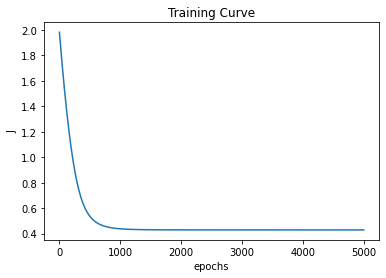

0.811

In [215]:
# Fit the model
# Initialize a generalized Logistic regression Model
reg = GenLogisticRegression()

reg.fit(X_train, y_train, eta = 0.01, epochs = 5000, show_curve=True)
y_hat = reg.predict(X_test)
accuracy(y_test, y_hat)


In [218]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
cm

array([[1526,   69],
       [ 309,   96]])

In [220]:
# Logistic regression from generalized logistic with SMOTE

from imblearn.over_sampling import SMOTE

reg = GenLogisticRegression()

reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

weights = reg.W
intercept = reg.B

for i in range(5):
  reg_ = GenLogisticRegression()
  reg_.W = weights
  reg_.B = intercept
  smt = SMOTE()
  X_train_, y_train_ = smt.fit_resample(X_train, y_train)
  
  reg_.fit(X_train_, y_train_, eta = 0.001, epochs = 10)


  weights = reg_.W
  intercept = reg_.B

y_hat = reg_.predict(X_train)
y_hat_test = reg_.predict(X_test)
print ("train accuray:", np.mean(y_train == y_hat))
print ("test accuracy :",  np.mean(y_test == y_hat_test))

train accuray: 0.80825
test accuracy : 0.811


In [222]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat_test)
cm

array([[1521,   74],
       [ 304,  101]])

### 3.2. ANN with Smote and class weights

0 2.7669253524822555
100 1.372990670008161
200 1.1154159895771818
300 1.0395239473514675
400 1.0103734780814266
500 0.9948830566043838
600 0.9847661161060873
700 0.9769789999759101
800 0.9703753420614231
900 0.9644761964144508
1000 0.9590386848246788
1100 0.9539244258935943
1200 0.9490933352343266
1300 0.9445497064713798
1400 0.9401945363789387
1500 0.9357905839590019
1600 0.9313424843699064
1700 0.9273469763303165
1800 0.9237936243898016
1900 0.9206046053939543
Training Accuracy:  0.8115


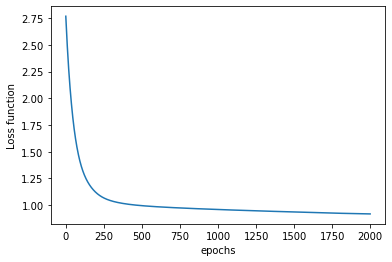

In [257]:
from imblearn.under_sampling import NearMiss
#nr = NearMiss()
#X_train_, y_train_ = nr.fit_sample(X_train, y_train)

ann = ANN([6,6,6 ], [np.tanh, np.tanh, np.tanh ] )
ann.fit(X_train, y_train, eta = 0.02, epochs = 2000, show_curve = True)
    
y_hat = ann.predict(X_test)
    
print(f"Training Accuracy: {accuracy(y_test, y_hat): 0.4f}")

In [0]:
# ANN with keep learning from previous runs with nearMiss or SMOTE every time (adding noise)

from imblearn.over_sampling import SMOTE

#reg = GenLogisticRegression()

#reg.fit(X_train, y_train)
#y_hat = reg.predict(test_X)
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_, y_train_ = nr.fit_sample(X_train, y_train)
ann = ANN([30,30,30, 30], [np.tanh, np.tanh, np.tanh, np.tanh] )
ann.fit(X_train, y_train, eta = 0.01, epochs = 500, show_curve = True)

weights = ann.W
w0 = ann.b

for i in range(50):
  ann_ = ANN([30 ,30,30, 30], [np.tanh, np.tanh, np.tanh, np.tanh])

  ann_.W = weights
  ann_.b = w0 
  #smt = SMOTE(random_state= i)
  nr = NearMiss(random_state=i)
  X_train_, y_train_ = nr.fit_sample(X_train, y_train)
  #X_train_, y_train_ = smt.fit_resample(X_train, y_train)
  
  ann_.fit(X_train_, y_train_, eta = 0.1, epochs = 1000)

  y_hat = ann_.predict(X_train)
  y_hat_test = ann_.predict(X_test)
  print ("train accuray:", np.mean(y_train == y_hat))
  print ("test accuracy :",  np.mean(y_test == y_hat_test))
  weights = ann_.W
  w0 = ann_.b

#y_hat = reg_.predict(X_train)
#y_hat_test = reg_.predict(X_test)
#print ("train accuray:", np.mean(y_train == y_hat))
#print ("test accuracy :",  np.mean(y_test == y_hat_test))

ANN with SMOTE


In [258]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [259]:
class_weight = {0: 1.,
                1: 1.3
                }

# Initialising the ANN
classifier = Sequential()

In [260]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 11))
#classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh'))
#classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh'))
#classifier.add(Dropout(p = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, class_weight=class_weight)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





8000/8000 [==============================] - 2s 200us/step - loss: 0.5471 - acc: 0.8065
Epoch 2/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.5084 - acc: 0.8044
Epoch 3/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.5070 - acc: 0.8066
Epoch 4/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.5057 - acc: 0.8049
Epoch 5/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.5017 - acc: 0.8074
Epoch 6/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4934 - acc: 0.8111
Epoch 7/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4798 - acc: 0.8235
Epoch 8/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4610 - acc: 0.8320
Epoch 9/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4425 - acc: 0

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [262]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1472,  123],
       [ 171,  234]])

In [0]:
cm_ratio = cm/cm.sum(axis = 0)

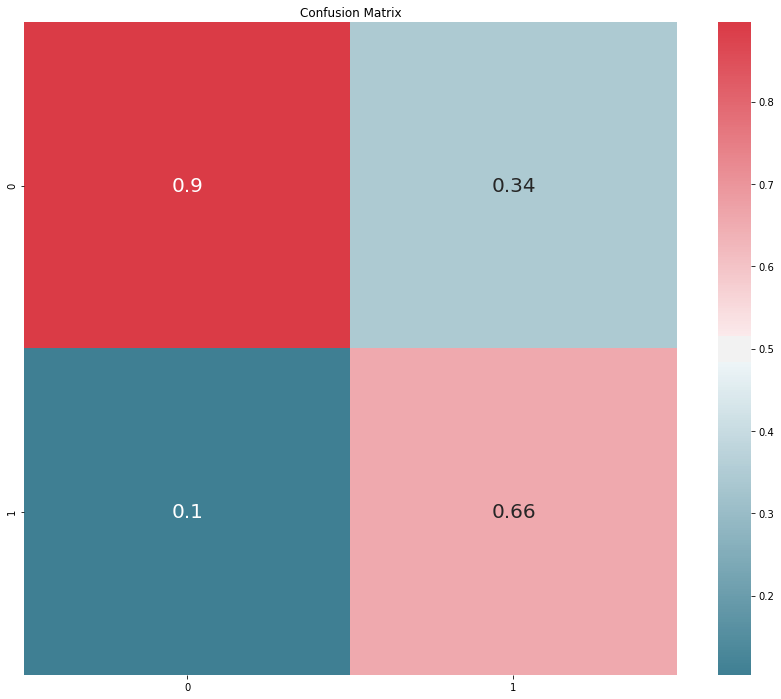

In [265]:
f, ax = plt.subplots(figsize=(15, 12))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

sns.heatmap(cm2_ratio, mask=np.zeros_like(cm2_ratio, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, ax=ax, annot_kws={"size":20})
plt.show()

### 3.3 K fold cross validation and grid search

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
import time

In [0]:
rt StratifiedKFold

#kfold = KFold(10, True, 1)
#for train, test in kfold.split(trn_X, trn_y)
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

#accuracies.mean()

#accuracies.std()

kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)

ifold = 0

temp_df = pd.DataFrame(list())
temp_df.to_csv('k_fold.csv.csv')
f = open('k_fold.csv', 'w')

dfObj = pd.DataFrame()

df_recall_prec = pd.DataFrame()
df_trn_X = pd.DataFrame(X_train)
df_trn_y = pd.DataFrame(y_train )

class_weight = {0: 1.,
                1: 1.3
                }

for train_index, test_index in kf.split(df_trn_X, df_trn_y):
    X_tr_va, X_test =  X_train[train_index],  X_train[test_index]
    y_tr_va, y_test = y_train[train_index], y_train[test_index]
    ifold = ifold +1

    classifier = Sequential()
  
    column_name = str(ifold)
 
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 11))
    #classifier.add(Dropout(p = 0.1))

    # Adding the second hidden layer
    #classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh'))
    #classifier.add(Dropout(p = 0.1))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh'))
    #classifier.add(Dropout(p = 0.1))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, class_weight=class_weight)
    
    
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)

    cm = confusion_matrix(y_test, y_pred)
    cm_ratio = cm/cm.sum(axis = 0)

     
    df_recall_prec[column_name] = cm_ratio.ravel()

    
 
df_recall_prec.to_csv("cm.csv")

In [0]:

df_recallPrec= df_recall_prec.T
df_= pd.DataFrame(data = df_recallPrec.to_numpy(), columns = ['0', 'recall', '2', 'Precision'])
df_


In [0]:
# no graphs as more time for the K fold runs

f, ax = plt.subplots(figsize=(8, 6))
plt.ylabel("recall and precision")
plt.title("K Fold Threshold Value Distribution")
df_.boxplot(column = ['recall', 'Precision'])

## Our winner is artifical neural network with class weights: 87% accuracy and 70% of recall.